## Imports

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
pd.set_option('display.max_columns', None)

### Some EDA

In [2]:
df = pd.read_csv('../../../high_diamond_ranked_10min.csv')
#importing the data

In [80]:
df.head(1)
#checking out the firt 5 rows

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7


In [81]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [5]:
df.info()
#looking at datatypes, and if there are null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

## First train test split and baseline logreg model

In [6]:
y = df['blueWins']
X = df.drop(['gameId', 'blueWins', 'redGoldDiff', 'redExperienceDiff'], axis=1)
#setting our target variable and everything else

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
#tts for the first logreg

In [8]:
print(y.value_counts())
#making sure there is no class imbalance

0    4949
1    4930
Name: blueWins, dtype: int64


In [9]:
logreg = LogisticRegression(max_iter=10)
#instantiating the first logreg model
logreg.fit(X_train, y_train)
#fitting the training data

/Users/joe/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10)

In [10]:
prediction = logreg.predict(X_test)
#making the first set of predictions

In [11]:
logreg.coef_
#checking the correlation coeffcients

array([[-2.01318134e-07,  5.85019156e-08,  3.75459786e-08,
         2.03937209e-07, -2.52988856e-07,  2.41645274e-07,
         9.13177800e-08,  9.01422078e-08,  1.17557212e-09,
         3.54494266e-09,  1.27766559e-04,  2.16481003e-08,
         9.23859828e-05,  5.12394446e-07,  7.71843067e-07,
         2.59898416e-04,  1.80983095e-04,  5.12394446e-08,
         1.27766559e-05, -2.02194194e-07, -2.31848395e-08,
        -3.79537861e-08, -2.52988856e-07,  2.03937209e-07,
        -2.63492102e-07, -8.95173197e-08, -8.25777766e-08,
        -6.93954309e-09,  1.46143571e-09, -1.32131856e-04,
        -2.34756338e-08, -8.85971118e-05, -2.60802210e-07,
        -2.43720202e-07, -2.60802210e-08, -1.32131856e-05]])

### First baseline model results

In [12]:
print('-'*40)
print('Accuracy Score:')
print(accuracy_score(y_test, prediction))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, prediction))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, prediction))


----------------------------------------
Accuracy Score:
0.7214574898785425
----------------------------------------
Confusion Matrix:
[[892 334]
 [354 890]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1226
           1       0.73      0.72      0.72      1244

    accuracy                           0.72      2470
   macro avg       0.72      0.72      0.72      2470
weighted avg       0.72      0.72      0.72      2470



# Decision Tree, Bagged Trees and Random Forrest Classifier

In [13]:
#setting target and everything else
y = df['blueWins']
X = df.drop(columns=['gameId', 'blueWins'])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)
#train test split for rfc

In [15]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
#making a decision tree and fitting the training data
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [16]:
# Feature importance
tree_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.00080781,
       0.        , 0.        , 0.02775427, 0.        , 0.        ,
       0.        , 0.        , 0.01057537, 0.        , 0.00568796,
       0.09577298, 0.00841332, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00239022, 0.        , 0.        ,
       0.        , 0.00346072, 0.        , 0.        , 0.        ,
       0.        , 0.01388357, 0.00168421, 0.00447086, 0.80531624,
       0.01559016, 0.00419232, 0.        ])

In [17]:
print(len(X.columns))
print(len(tree_clf.feature_importances_))
#making sure they are the same length

38
38


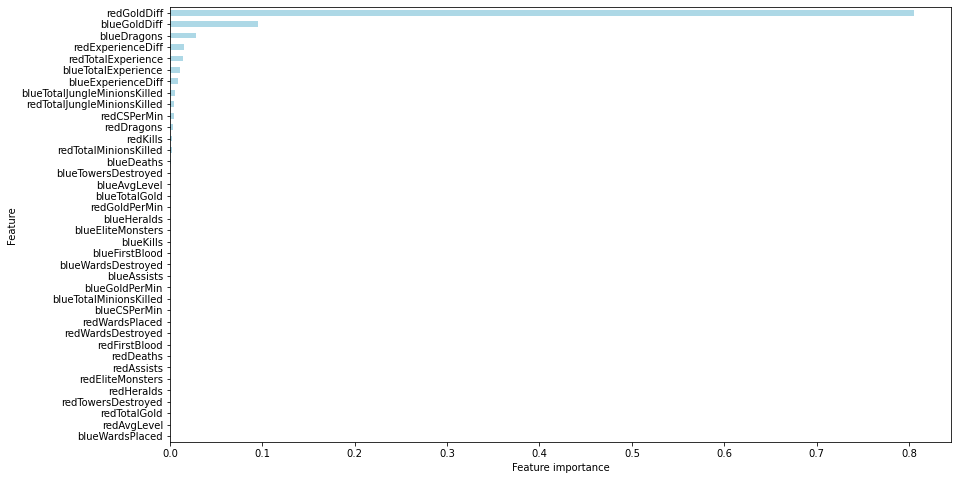

In [18]:
def plot_feature_importances(model):
    plt.figure(figsize=(14,8))
    pd.Series(model.feature_importances_, index=X.columns).sort_values().plot(kind='barh', color='lightblue')
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)
#function used to make a graph of feature importance

In [19]:
# Test set predictions
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[884 371]
 [357 858]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1255
           1       0.70      0.71      0.70      1215

    accuracy                           0.71      2470
   macro avg       0.71      0.71      0.71      2470
weighted avg       0.71      0.71      0.71      2470



In [20]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))
#testing accuracy

Testing Accuracy for Decision Tree Classifier: 70.53%


# Bagging Tree

In [21]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [22]:
bagged_tree.fit(X_train, y_train)
#fitting the training data

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [23]:
bagged_tree.score(X_train, y_train)
#training score

0.7525981913888514

In [24]:
bagged_tree.score(X_test, y_test)
#testing score

0.7064777327935222

# Random Forest

In [25]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)
#instatiating and fitting a random forrest

RandomForestClassifier(max_depth=5)

In [26]:
# Training accuracy score
forest.score(X_train, y_train)

0.7486840329329194

In [27]:
# Test accuracy score
forest.score(X_test, y_test)

0.7117408906882591

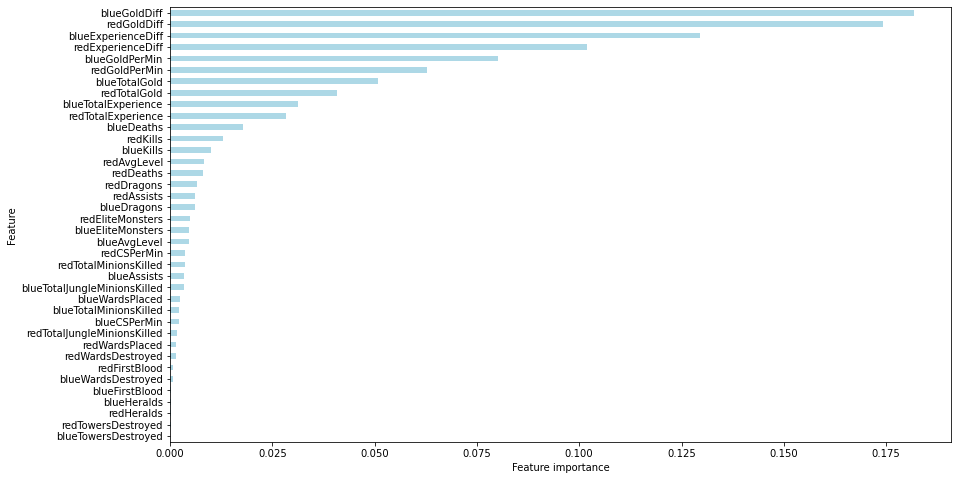

In [28]:
plot_feature_importances(forest)
#looking at feature importance

top 5 features against target
explain what we tried but not in depth
bring it back to the business problem

# Grid Search

In [29]:
#setting target and everything else
y = df['blueWins']
X = df.drop(['gameId', 'blueWins'], axis=1)

In [30]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
dt_clf = DecisionTreeClassifier()
#instantiating a decision tree
dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
#getting the cross val score after 3 cross validations 
mean_dt_cv_score = np.mean(dt_cv_score)
#taking the mean of that score

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")
#printing formatting

Mean Cross Validation Score: 62.60%


In [32]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}
#makaing a parameter grid for the decision tree so it can decide which is the best to use

In [33]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [34]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

#printing the scores and the best parameters
print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 76.82%
Mean Test Score: 71.38%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [35]:
rf_clf = RandomForestClassifier()
#making random forrest
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))
#mean cross validation score for random forest

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 72.14%


In [36]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}
#looking for best parameters

In [37]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
#grid search for random forrest
rf_grid_search.fit(X_train, y_train)
#fitting it
#and getting scores
print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 73.18%

Optimal Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 100}


In [38]:
dt_score = dt_grid_search.score(X_test, y_test)
rf_score = rf_grid_search.score(X_test, y_test)
#getting and printing out scores
print('Decision tree grid search: ', dt_score)
print('Random forest grid search: ', rf_score)

Decision tree grid search:  0.7137651821862349
Random forest grid search:  0.7182186234817813


# ADA and Gradient boosting 

In [39]:
#setting target and everything else
y = df['blueWins']
X = df.drop(['gameId', 'blueWins'], axis=1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
#train test split

In [41]:
# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier()

# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier()

In [42]:
adaboost_clf.fit(X_train, y_train)
#fititng the training data for the ADA boost

AdaBoostClassifier()

In [43]:
gbt_clf.fit(X_train, y_train)
#same thing for gradient boosting

GradientBoostingClassifier()

In [44]:
# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [45]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
#function to display accuracy and f1 score
#displaying the metrics
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.7373464705088406
F1-Score: 0.7337893296853625

Model: Gradient Boosted Trees
Accuracy: 0.759076798488325
F1-Score: 0.7571098108586202

Testing Metrics
Model: AdaBoost
Accuracy: 0.7190283400809716
F1-Score: 0.7178861788617886

Model: Gradient Boosted Trees
Accuracy: 0.7251012145748987
F1-Score: 0.7269802975472457


In [46]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
#confusion matricx for ada boost
adaboost_confusion_matrix

array([[893, 349],
       [345, 883]])

In [47]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
#gradient booster confusion matrix
gbt_confusion_matrix

array([[887, 355],
       [324, 904]])

In [48]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)
#classification report

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1242
           1       0.72      0.72      0.72      1228

    accuracy                           0.72      2470
   macro avg       0.72      0.72      0.72      2470
weighted avg       0.72      0.72      0.72      2470



In [49]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1242
           1       0.72      0.74      0.73      1228

    accuracy                           0.73      2470
   macro avg       0.73      0.73      0.73      2470
weighted avg       0.73      0.73      0.73      2470



# KNN

In [50]:
# imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.preprocessing import MaxAbsScaler

In [51]:
y = df['blueWins']
X = df.drop(['gameId', 'blueWins'], axis=1)
#setting me variabels

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#training testing splitting

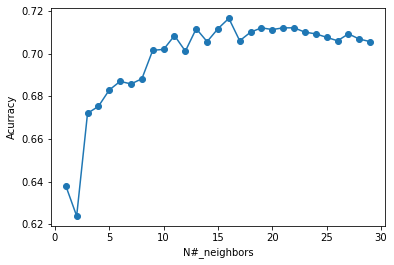

0.6720647773279352


In [57]:
k_range = range(1,30)
scores = list()
for k in k_range:
    knn =  KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred_knn))
plt.plot(k_range,scores,marker="o")
plt.ylabel("Acurracy")
plt.xlabel("N#_neighbors")
plt.show()
knn =  KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_test,y_pred_knn))
#graph of knn using a for loop from Ross

# XGBOOST

In [58]:
from xgboost import XGBClassifier

In [59]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [60]:
y = df['blueWins']
X = df.drop(['gameId', 'blueWins', 'redTowersDestroyed', 'blueTowersDestroyed', 'redHeralds', 'blueHeralds'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#choosing which variables i want to try to include and setitng them

In [61]:
clf = XGBClassifier()
#making the XGBoost
clf.fit(X_train, y_train)
#fitting the training data
training_preds = clf.predict(X_train)
#getting training predictions
test_preds = clf.predict(X_test)
#test predictions
training_accuracy = accuracy_score(y_train, training_preds)
#getting the accuracy score for the training
test_accuracy = accuracy_score(y_test, test_preds)
#accuracy score for testing
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 96.56%
Validation accuracy: 70.2%


In [62]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}
#looking for best parameters

In [63]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5, n_jobs=1)
#making a grid search
grid_clf.fit(X_train, y_train)
#fitting the data

best_parameters = grid_clf.best_params_
#getting the best parameters and saving them

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))
#for loop to display the best parameters

training_preds = grid_clf.predict(X_train)
#training predictions
test_preds = grid_clf.predict(X_test)
#testing predictions
training_accuracy = accuracy_score(y_train, training_preds)
#training score
test_accuracy = accuracy_score(y_test, test_preds)
#testing score

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Testing accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7

Training Accuracy: 85.33%
Testing accuracy: 71.3%


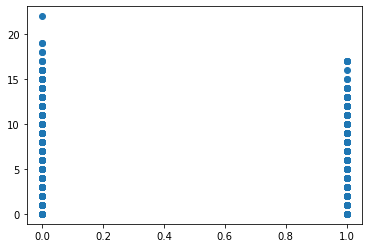

In [64]:
x = df['blueWins']
y = df['redKills']
plt.scatter(x,y)
plt.show()
#trying to visulize highly predictive variables

<AxesSubplot:xlabel='blueWins', ylabel='redKills'>

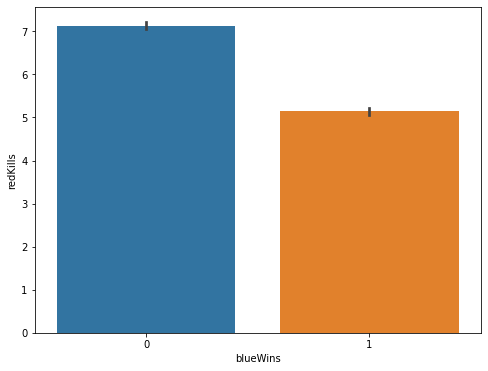

In [82]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df, x='blueWins', y='redKills', ax=ax)
#bar graph showing blue wins vs red kills, repeating the same process for the rest of the graphs

<AxesSubplot:xlabel='blueWins', ylabel='blueAvgLevel'>

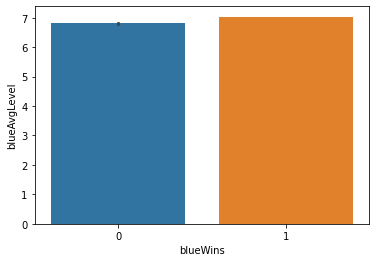

In [83]:
sns.barplot(x='blueWins', y='blueAvgLevel', data=df)

<AxesSubplot:xlabel='blueWins', ylabel='redKills'>

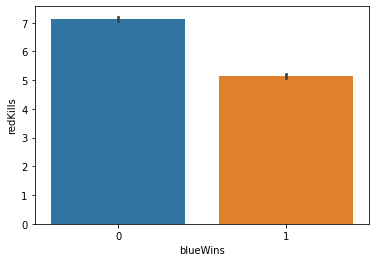

In [88]:
sns.barplot(x='blueWins', y='redKills', data=df)

<AxesSubplot:xlabel='blueWins', ylabel='blueKills'>

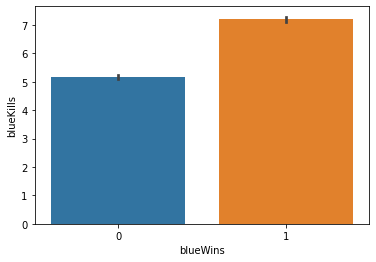

In [89]:
sns.barplot(x='blueWins', y='blueKills', data=df)

<AxesSubplot:xlabel='blueWins', ylabel='redAvgLevel'>

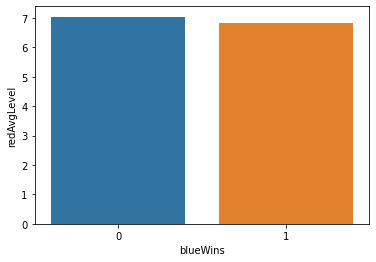

In [90]:
sns.barplot(x='blueWins', y='redAvgLevel', data=df)